In [1]:
import ndlib
import networkx as nx
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.opinions as op
import json
import warnings
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

no display found. Using non-interactive Agg backend
no display found. Using non-interactive Agg backend


### Modifiche apportate alla libreria ndlib:

#### Modifiche ai colori 

file <tt>DiffusionVix.py </tt>
- <tt>11: import seaborn as sns
- <tt>59: # Create an array with the colors you want to use </tt> 
- <tt>60: colors = ["#3b4cc0", "#b40426"]</tt>
- <tt>61: # Set your custom color palette</tt>
- <tt>62: cols = sns.set_palette(sns.color_palette(colors))</tt>
- <tt>72/76: plt.plot(..., color = cols) # , alpha=0.5) # , color=cols[i])
- <tt>83: plt.xlabel("Iterations", fontsize=14)
- <tt>84: plt.ylabel(self.ylabel, fontsize=14)
- <tt>85: plt.legend(loc="best", fontsize=12)

In [2]:
%run Utilyties.ipynb
%matplotlib inline

In [3]:
data = read_data('../data/final/data_complete.json')

G = init_network(data)

Alcune informazioni iniziali sui dati sono:
* TOT Retweet =  29863
* TOT Quote =  1187
* TOT Mentions =  57896
* TOT Reply =  3000




In [4]:
network_node_edge(G, 'G')

La rete G ha:

* Numero di nodi =  16675
* Numero di Edge =  52373


In [5]:
G0 = giant_component(G)

In [6]:
network_node_edge(G0, 'Giant component')

La rete Giant component ha:

* Numero di nodi =  16074
* Numero di Edge =  51932


Calcolo la frazione di infezione <b>reale</b>

In [7]:
counter = 0
for node in G0.nodes:
    if G.nodes[node]['classification']>0: 
        counter += 1
        
real = round(counter/G0.number_of_nodes(), 2)
        
print(f"Probabilità di infezione: {real}")

Probabilità di infezione: 0.34


Creo il <b>Complete Graph H</b> da 3000 nodi casuali della G0

In [8]:
import random as rd 

rd.seed(42)

sample = rd.sample(G0.nodes, 3000)
H = nx.complete_graph(sample)

#associo ad ogni nodo del Complete Graph la propria classificazione 
labels = nx.get_node_attributes(G0, 'classification') 
nx.set_node_attributes(H, labels, 'classification')

# Voter

In [9]:
def voter_model (network, fraction, n):
    model = op.VoterModel(network)
    config = mc.Configuration()

    config.add_model_parameter('fraction_infected', fraction)
    model.set_initial_status(config)

    iterations = model.iteration_bunch(n, progress_bar = False)
    trends = model.build_trends(iterations)

    plt.figure(figsize=(8,5))
    viz = DiffusionTrend(model, trends)
    viz.plot()

## Complete Graph

Fraction infected: 
- 0,25 
- 0,5 
- 0,75 
- reale (0,37)


 FRACTION INFECTED = 0.25 


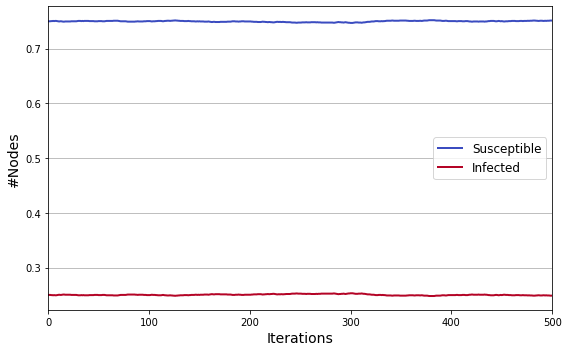


 FRACTION INFECTED = 0.5 


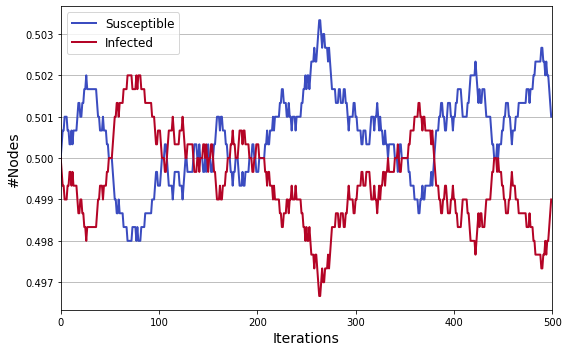


 FRACTION INFECTED = 0.75 


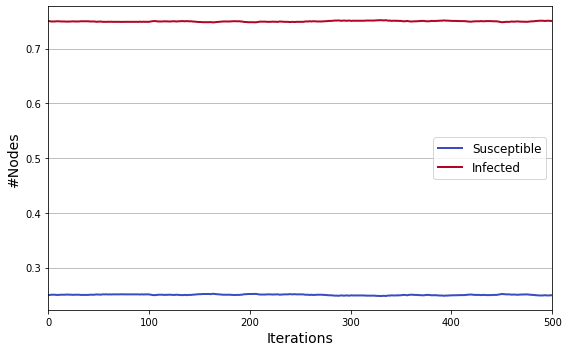


 FRACTION INFECTED = 0.34 


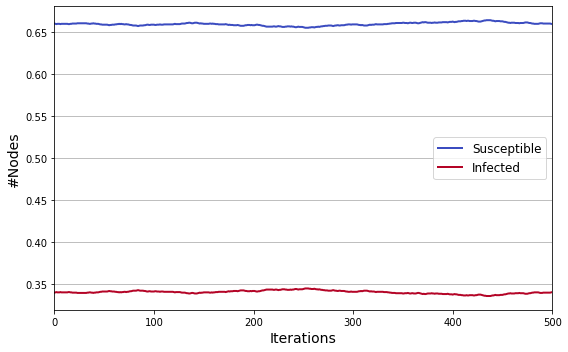

In [16]:
for f in [0.25, 0.5, 0.75, real]:
    print(f"\n\033[1m FRACTION INFECTED = {f} \033[0m")
    voter_model (H, f, 500)

## Crawled Data

Fraction infected: 
- 0,25 
- 0,5 
- 0,75 
- reale (0,37)


 FRACTION INFECTED = 0.25 


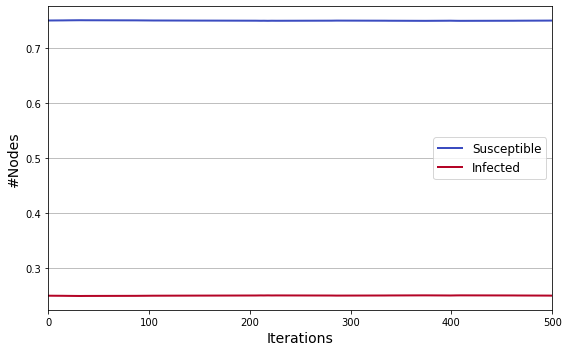


 FRACTION INFECTED = 0.5 


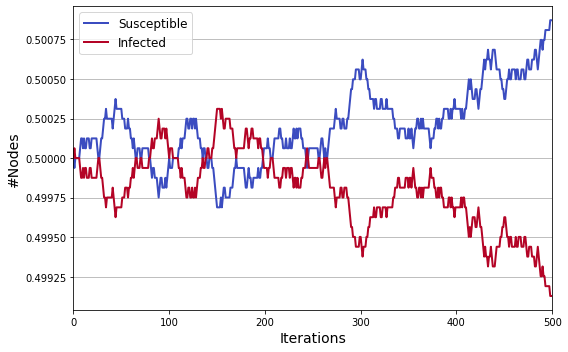


 FRACTION INFECTED = 0.75 


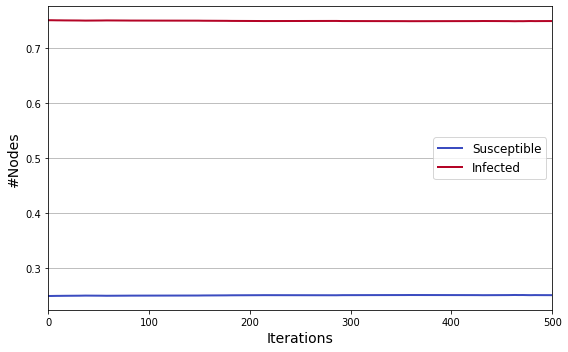


 FRACTION INFECTED = 0.34 


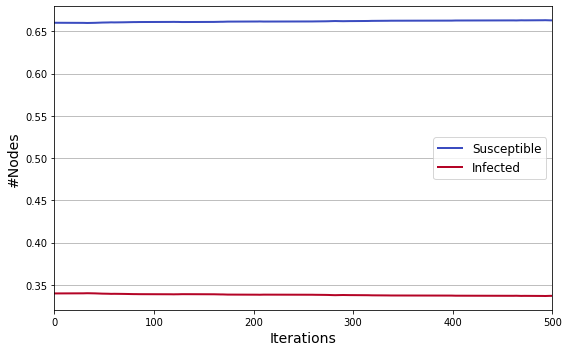

In [17]:
for f in [0.25, 0.5, 0.75, real]:
    print(f"\n\033[1m FRACTION INFECTED = {f} \033[0m")
    voter_model (G0, f, 500)

# Sznajd Model

In [26]:
def sznajd_model (network, fraction, n):
    model = op.SznajdModel(network)
    config = mc.Configuration()

    config.add_model_parameter('fraction_infected', fraction)
    model.set_initial_status(config)

    iterations = model.iteration_bunch(n)
    trends = model.build_trends(iterations)

    plt.figure(figsize=(8,5))
    viz = DiffusionTrend(model, trends)
    viz.plot()

## Complete Graph

Fraction infected: 
- 0,25 
- 0,5 
- 0,75 
- reale (0,37)


 FRACTION INFECTED = 0.25 


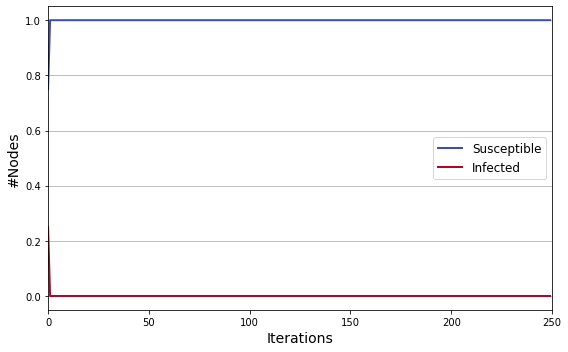


 FRACTION INFECTED = 0.5 


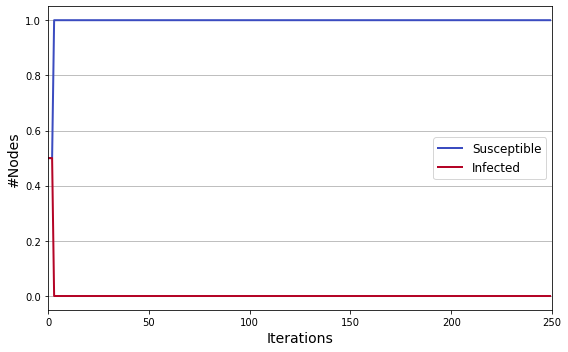


 FRACTION INFECTED = 0.75 


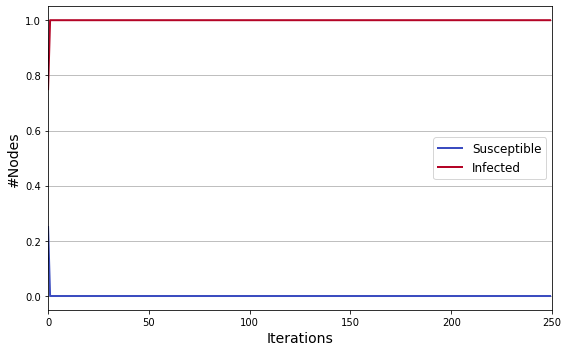


 FRACTION INFECTED = 0.34 


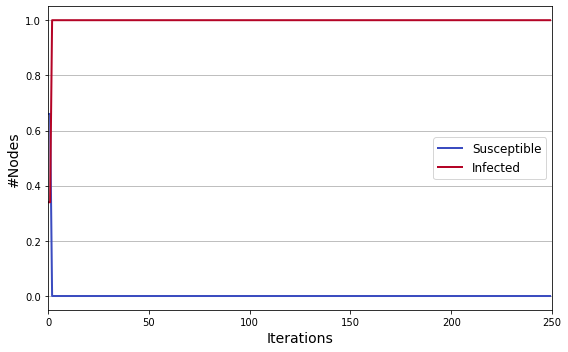

In [27]:
for f in [0.25, 0.5, 0.75, real]:
    print(f"\n\033[1m FRACTION INFECTED = {f} \033[0m")
    sznajd_model (H, f, 250)

## Crawled Data

Fraction infected: 
- 0,25 
- 0,5 
- 0,75 
- reale (0,37)


 FRACTION INFECTED = 0.25 


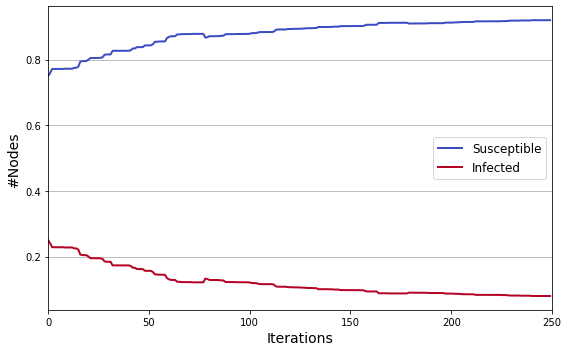


 FRACTION INFECTED = 0.5 


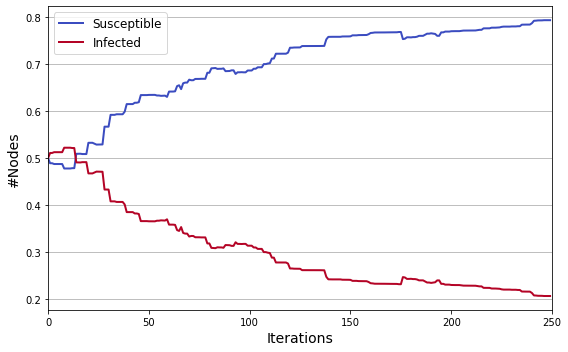


 FRACTION INFECTED = 0.75 


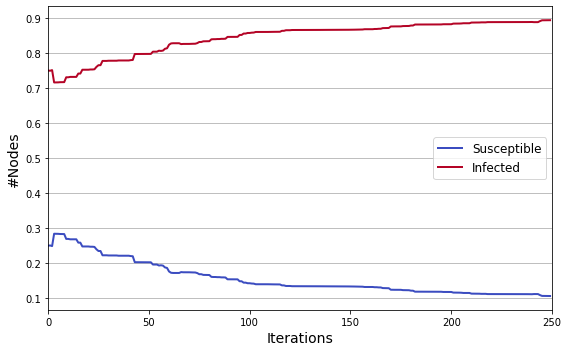


 FRACTION INFECTED = 0.34 


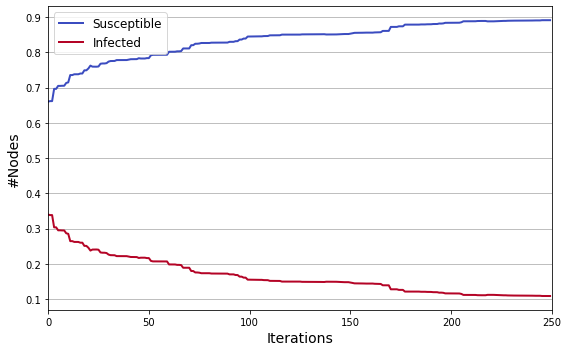

In [28]:
for f in [0.25, 0.5, 0.75, real]:
    print(f"\n\033[1m FRACTION INFECTED = {f} \033[0m")
    sznajd_model (G0, f, 250)

# QVoter Model

In [9]:
def qvoter_model (network, q, fraction, n):
    model = op.QVoterModel(network)
    config = mc.Configuration()
    config.add_model_parameter('q', q)
    config.add_model_parameter('fraction_infected', fraction)

    model.set_initial_status(config)

    # Simulation execution
    iterations = model.iteration_bunch(n, progress_bar=False)
    trends = model.build_trends(iterations)

    plt.figure(figsize=(8,5))
    viz = DiffusionTrend(model, trends)
    viz.plot()

## Complete Graph

Fraction infected: 
- 0,25 con 3, 5 e 10 vicini
- 0,5 con 3, 5 e 10 vicini
- 0,75 con 3, 5 e 10 vicini
- reale (0,37) con 3, 5 e 10 vicini


### Fraction infected = 0.25

#### Number of neighbours = 3


 ----------------------------- FRACTION INFECTED = 0.25 -----------------------------

 Number of neighbours = 3 


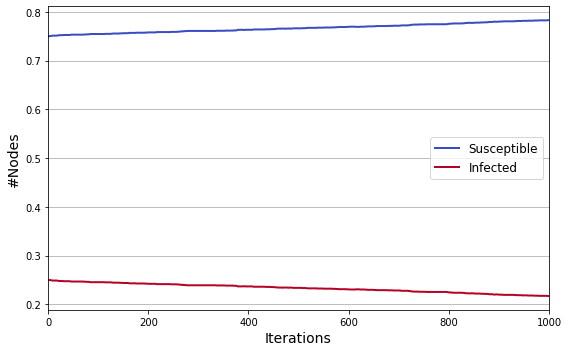


 Number of neighbours = 5 


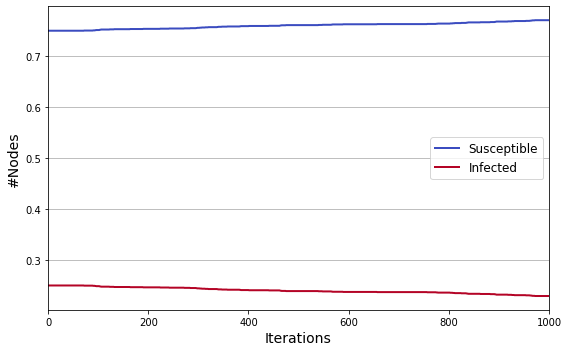


 Number of neighbours = 10 


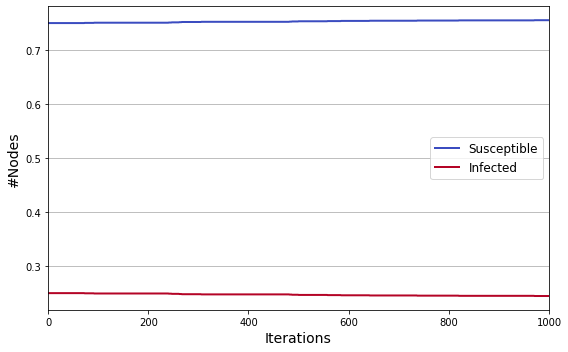


 Number of neighbours = 100 


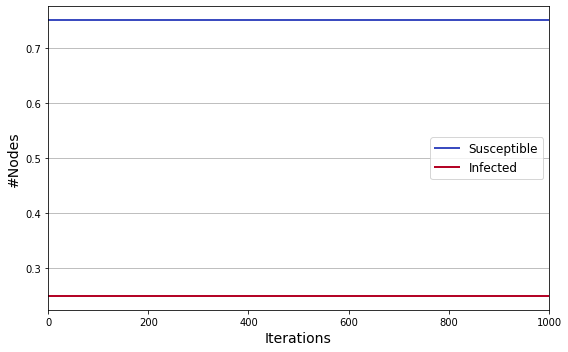


 ----------------------------- FRACTION INFECTED = 0.5 -----------------------------

 Number of neighbours = 3 


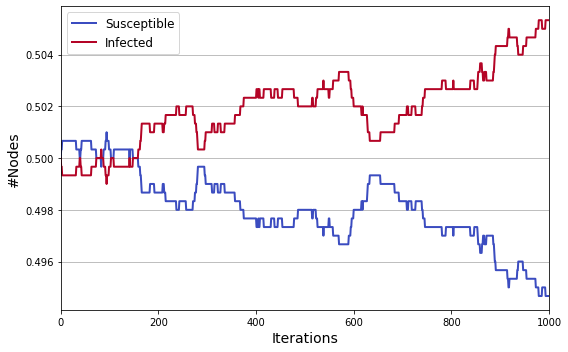


 Number of neighbours = 5 


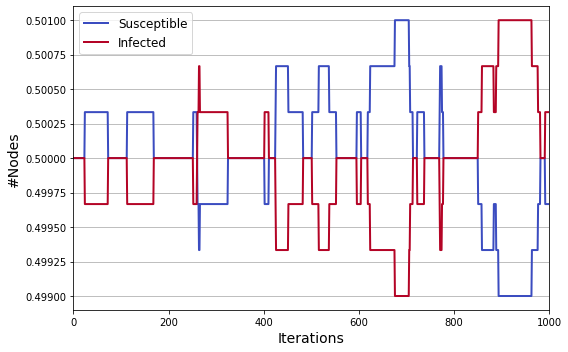


 Number of neighbours = 10 


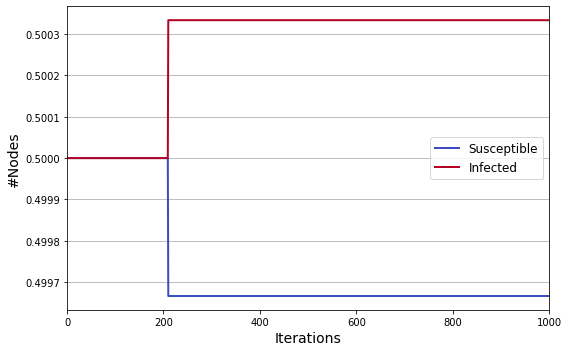


 Number of neighbours = 100 


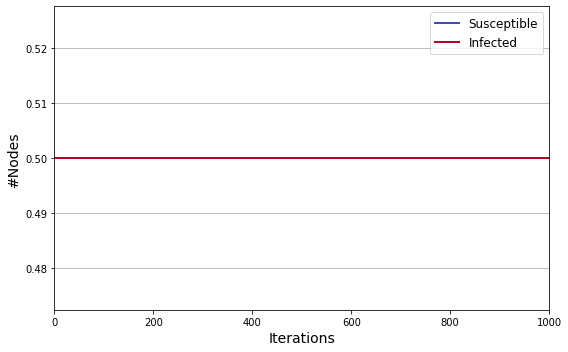


 ----------------------------- FRACTION INFECTED = 0.75 -----------------------------

 Number of neighbours = 3 


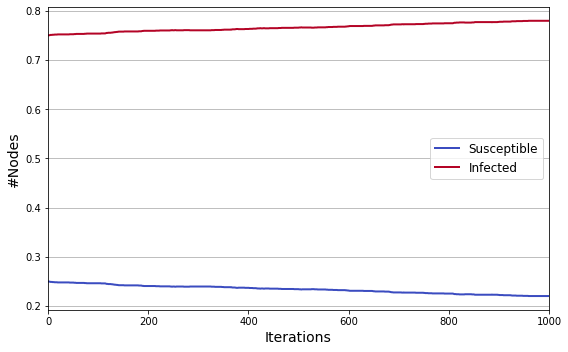


 Number of neighbours = 5 


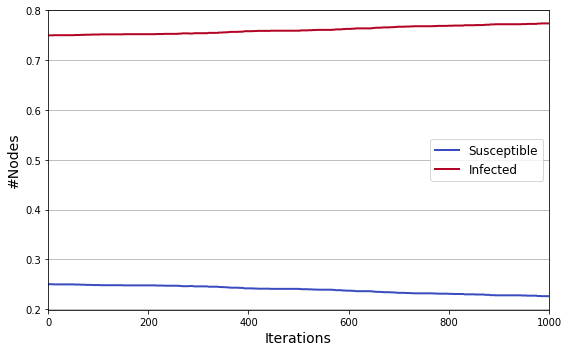


 Number of neighbours = 10 


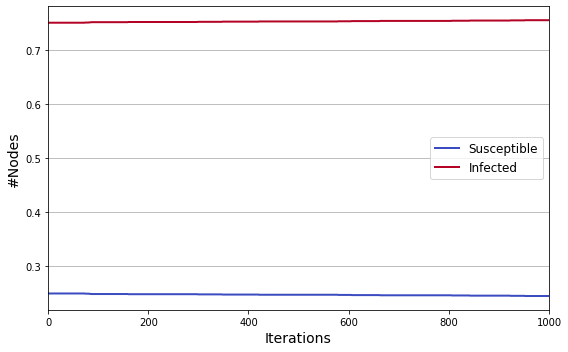


 Number of neighbours = 100 


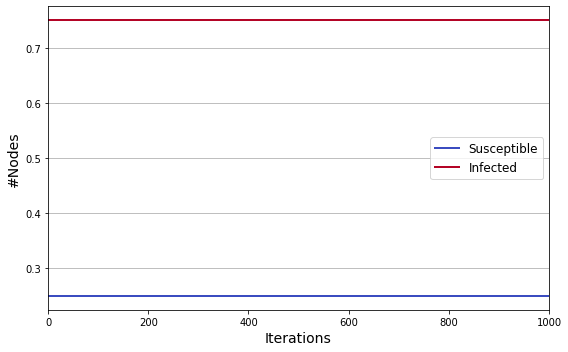


 ----------------------------- FRACTION INFECTED = 0.34 -----------------------------

 Number of neighbours = 3 


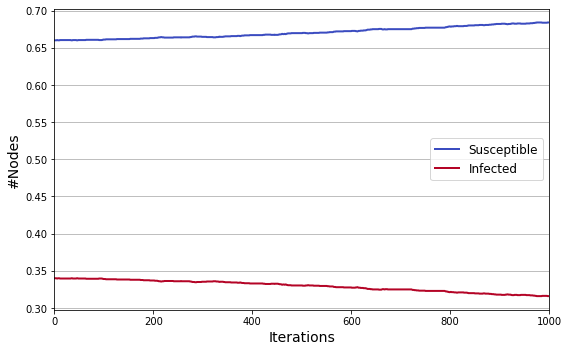


 Number of neighbours = 5 


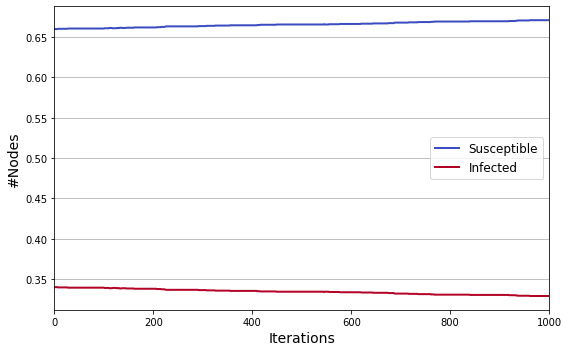


 Number of neighbours = 10 


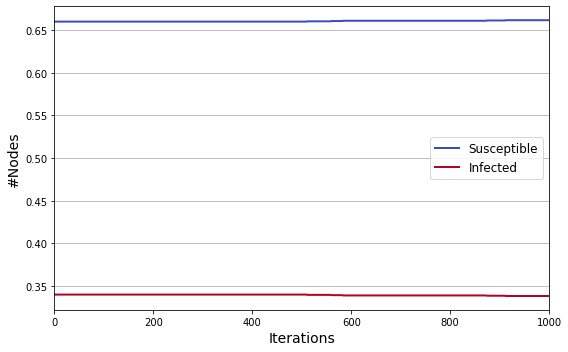


 Number of neighbours = 100 


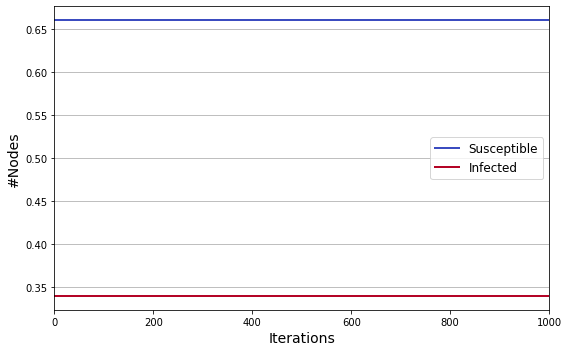

In [23]:
for f in [0.25, 0.5, 0.75, real]:
    print(f"\n\033[1m ----------------------------- FRACTION INFECTED = {f} -----------------------------\033[0m")
    for q in [3,5,10,100]:
        print(f"\n\033[1m Number of neighbours = {q} \033[0m")
        qvoter_model (H, q, f, 1000)

## Crawled Data

Fraction infected: 
- 0,25 con 10, 50 e 100 vicini
- 0,5 con 10, 50 e 100 vicini
- 0,75 con 10, 50 e 100 vicini
- reale (0,37) con 10, 50 e 100 vicini



 ----------------------------- FRACTION INFECTED = 0.25 -----------------------------

 Number of neighbours = 3 


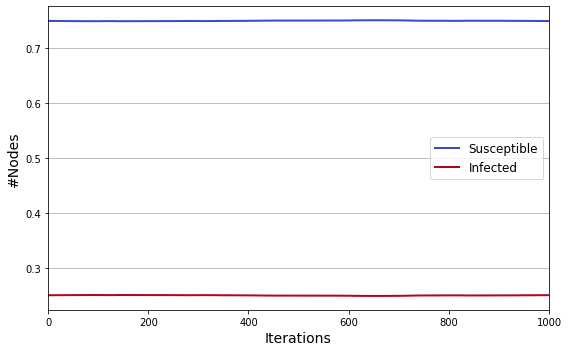


 Number of neighbours = 5 


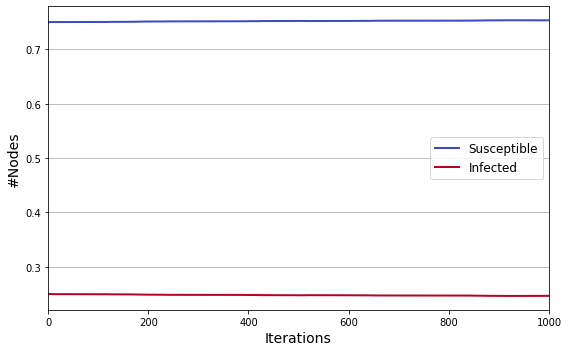


 Number of neighbours = 10 


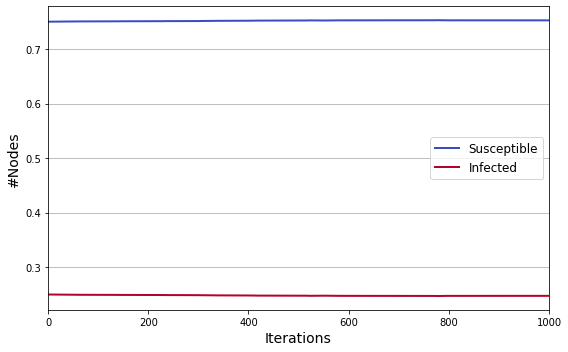


 Number of neighbours = 100 


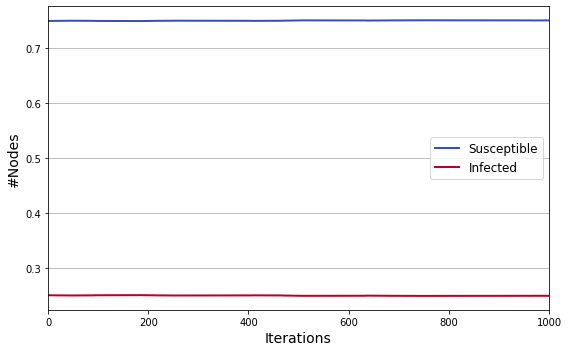


 ----------------------------- FRACTION INFECTED = 0.5 -----------------------------

 Number of neighbours = 3 


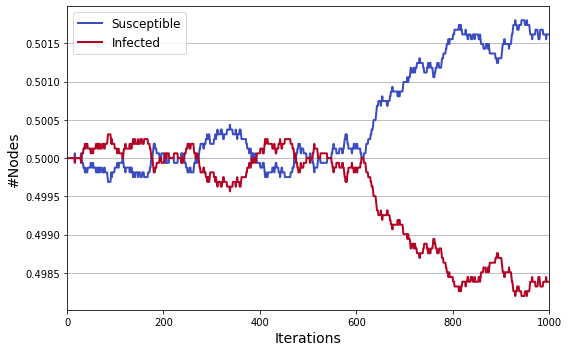


 Number of neighbours = 5 


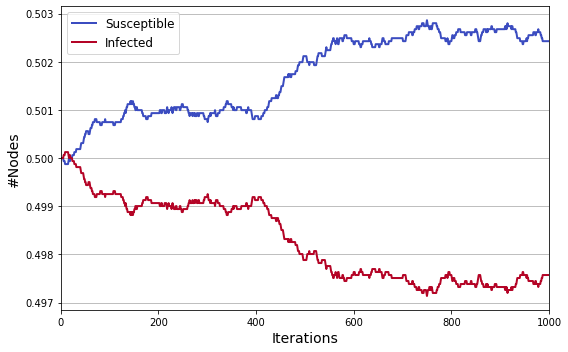


 Number of neighbours = 10 


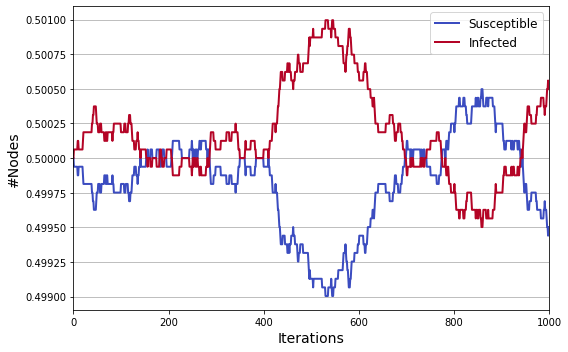


 Number of neighbours = 100 


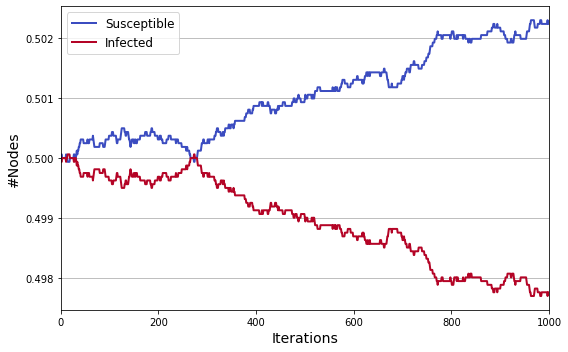


 ----------------------------- FRACTION INFECTED = 0.75 -----------------------------

 Number of neighbours = 3 


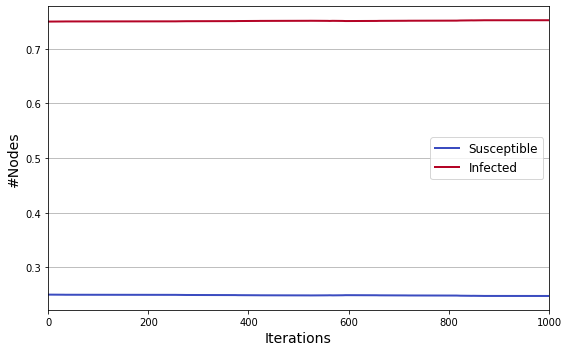


 Number of neighbours = 5 


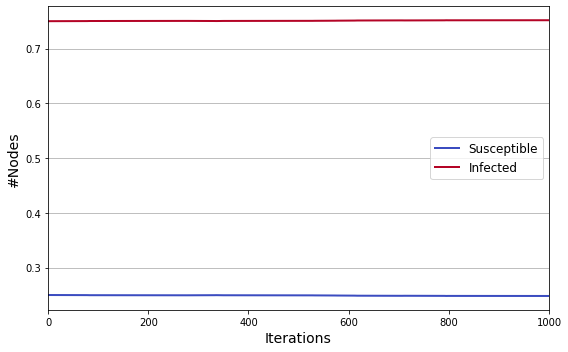


 Number of neighbours = 10 


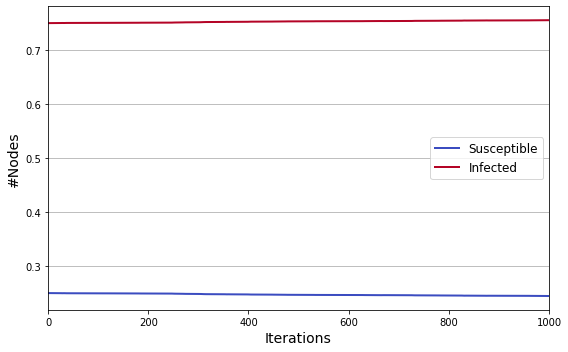


 Number of neighbours = 100 


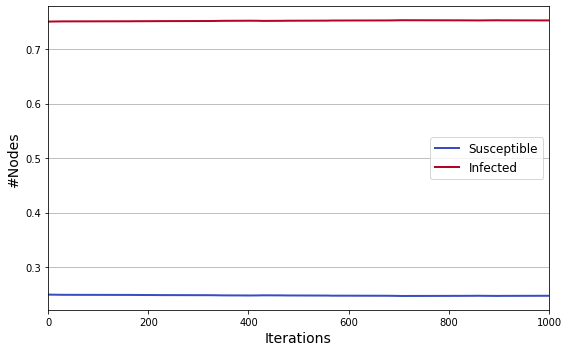


 ----------------------------- FRACTION INFECTED = 0.34 -----------------------------

 Number of neighbours = 3 


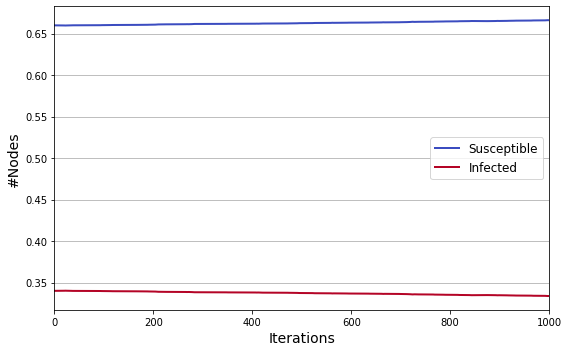


 Number of neighbours = 5 


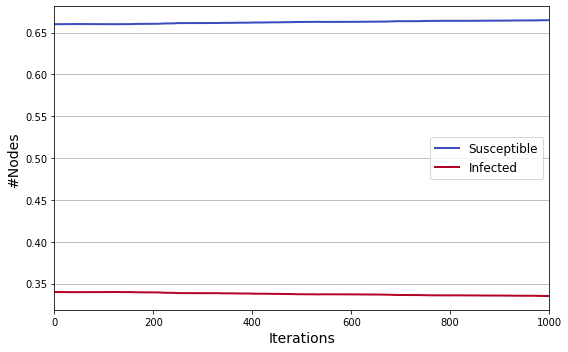


 Number of neighbours = 10 


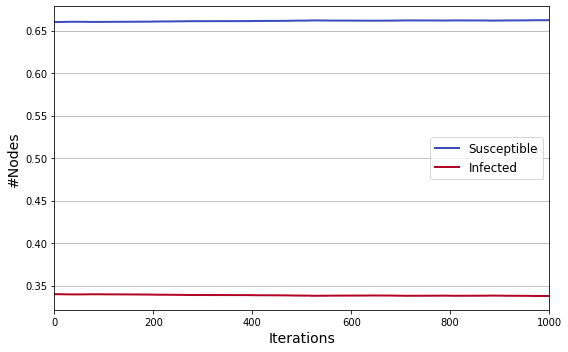


 Number of neighbours = 100 


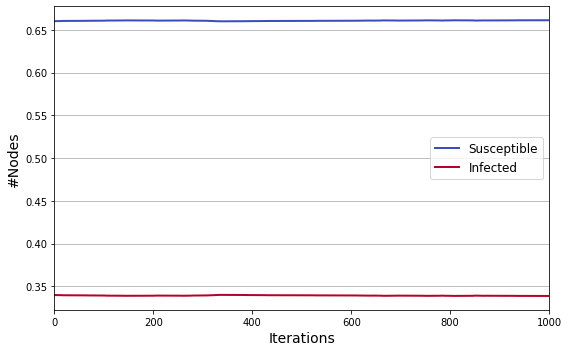

In [10]:
for f in [0.25, 0.5, 0.75, real]:
    print(f"\n\033[1m ----------------------------- FRACTION INFECTED = {f} -----------------------------\033[0m")
    for q in [3,5,10,100]:
        print(f"\n\033[1m Number of neighbours = {q} \033[0m")
        qvoter_model (G0, q, f, 1000)

# Majority Rule Model 

In [29]:
def majority_model (network, q, fraction, n):
    model = op.MajorityRuleModel(network)
    config = mc.Configuration()
    config.add_model_parameter('q', q)
    config.add_model_parameter('fraction_infected', fraction)

    model.set_initial_status(config)

    # Simulation execution
    iterations = model.iteration_bunch(n)
    trends = model.build_trends(iterations)

    plt.figure(figsize=(8,5))
    viz = DiffusionTrend(model, trends)
    viz.plot()

## Complete Graph

Fraction infected: 
- 0,25 con 10, 50 e 100 vicini
- 0,5 con 10, 50 e 100 vicini
- 0,75 con 10, 50 e 100 vicini
- reale (0,37) con 10, 50 e 100 vicini



 ----------------------------- FRACTION INFECTED = 0.25 -----------------------------

 Number of neighbours = 3 


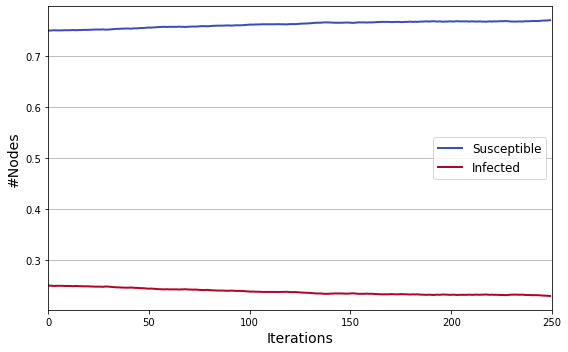


 Number of neighbours = 5 


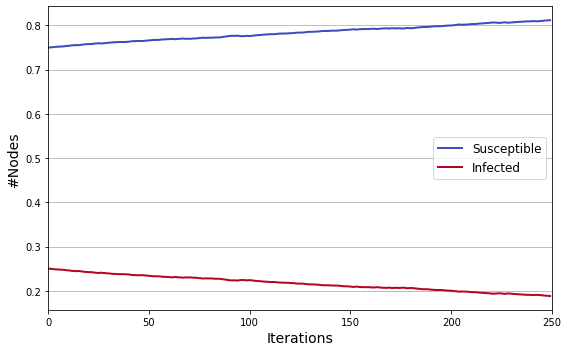


 Number of neighbours = 10 


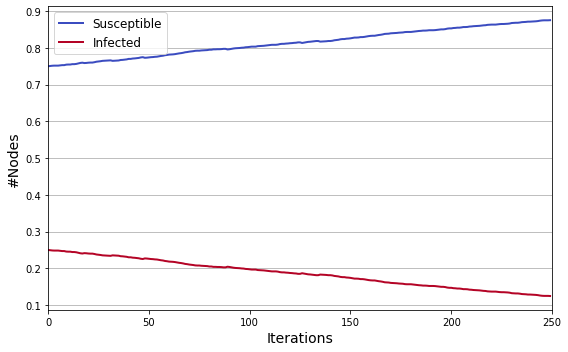


 Number of neighbours = 100 


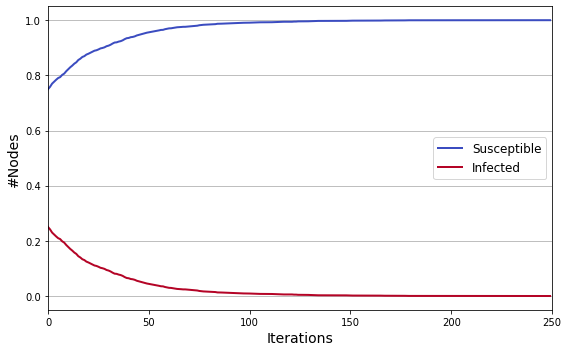


 ----------------------------- FRACTION INFECTED = 0.5 -----------------------------

 Number of neighbours = 3 


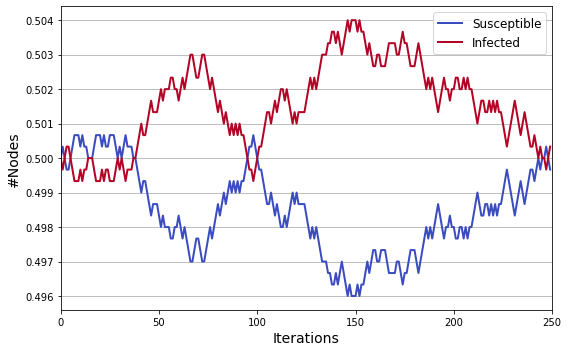


 Number of neighbours = 5 


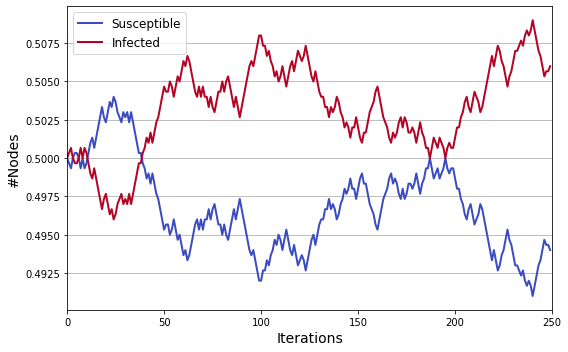


 Number of neighbours = 10 


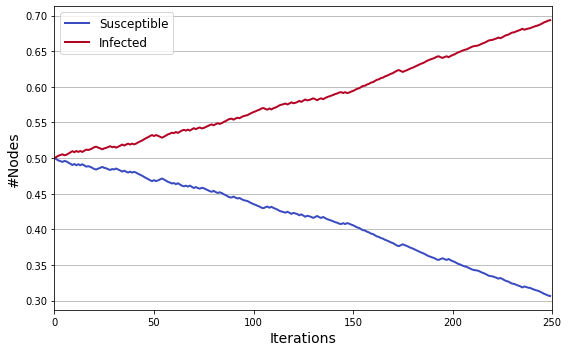


 Number of neighbours = 100 


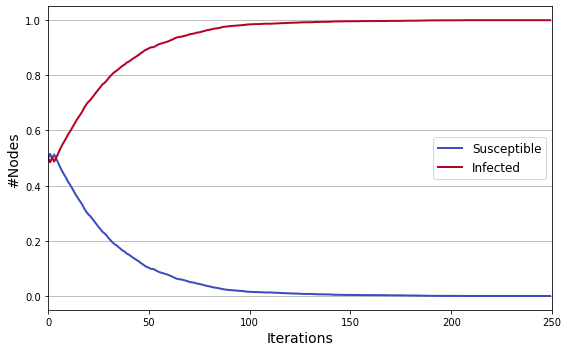


 ----------------------------- FRACTION INFECTED = 0.75 -----------------------------

 Number of neighbours = 3 


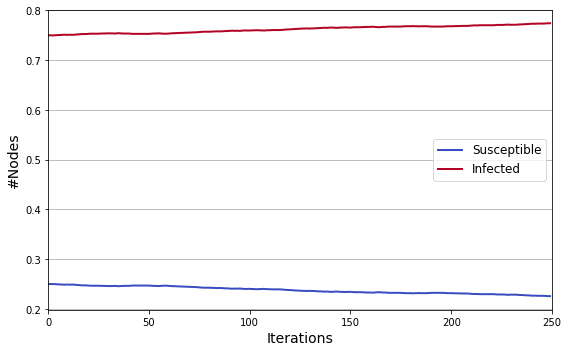


 Number of neighbours = 5 


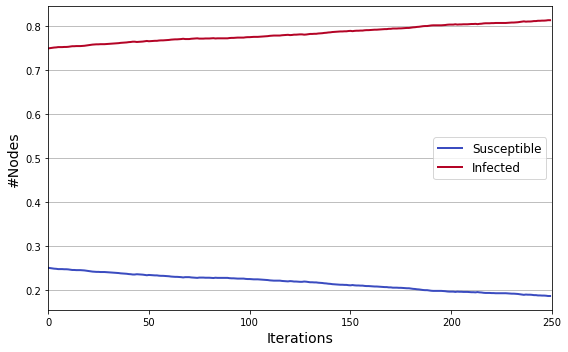


 Number of neighbours = 10 


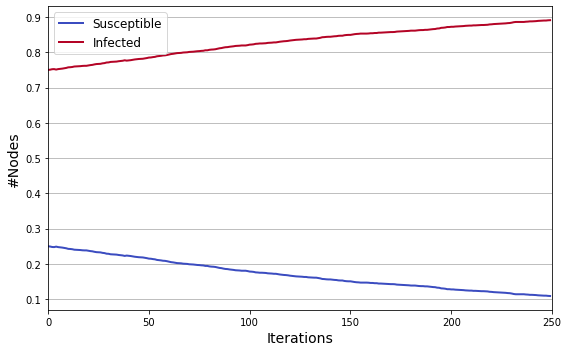


 Number of neighbours = 100 


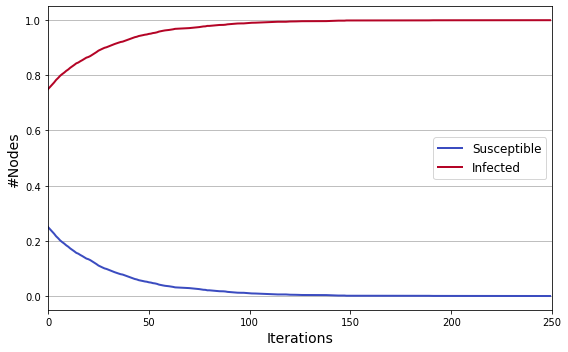


 ----------------------------- FRACTION INFECTED = 0.34 -----------------------------

 Number of neighbours = 3 


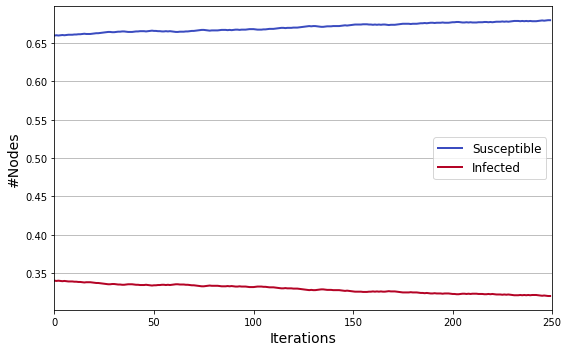


 Number of neighbours = 5 


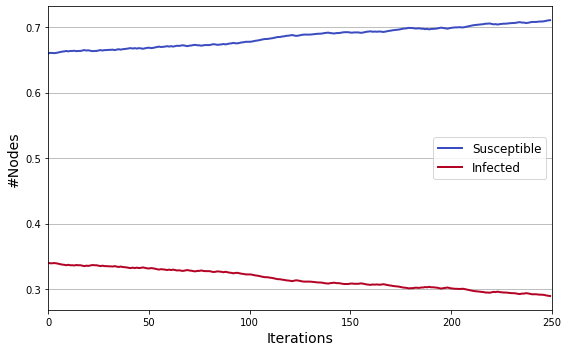


 Number of neighbours = 10 


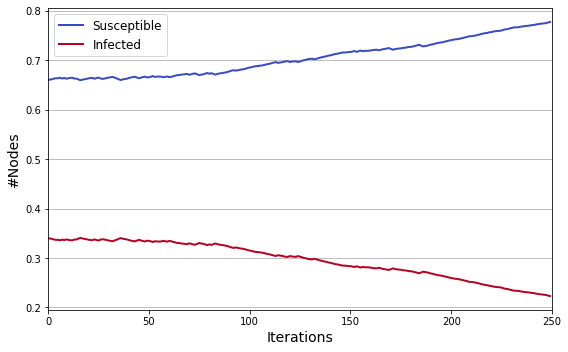


 Number of neighbours = 100 


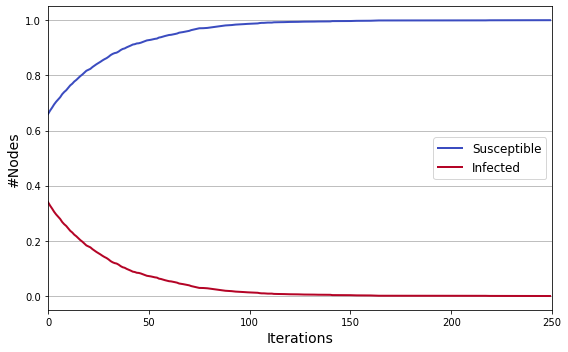

In [31]:
for f in [0.25, 0.5, 0.75, real]:
    print(f"\n\033[1m ----------------------------- FRACTION INFECTED = {f} -----------------------------\033[0m")
    for q in [3,5,10,100]:
        print(f"\n\033[1m Number of neighbours = {q} \033[0m")
        majority_model (H, q, f, 250)

## Crawled Data

Fraction infected: 
- 0,25 con 10, 50 e 100 vicini
- 0,5 con 10, 50 e 100 vicini
- 0,75 con 10, 50 e 100 vicini
- reale (0,37) con 10, 50 e 100 vicini



 ----------------------------- FRACTION INFECTED = 0.25 -----------------------------

 Number of neighbours = 3 


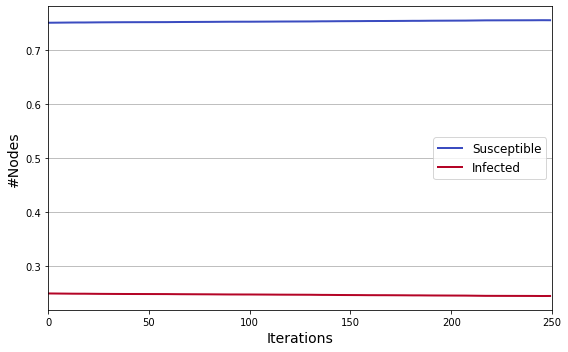


 Number of neighbours = 5 


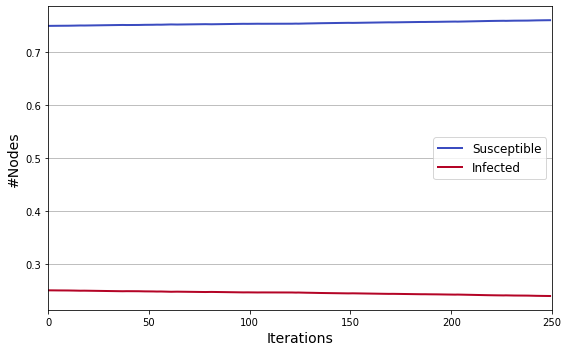


 Number of neighbours = 10 


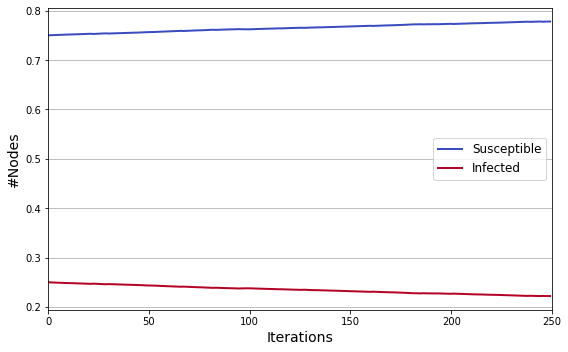


 Number of neighbours = 100 


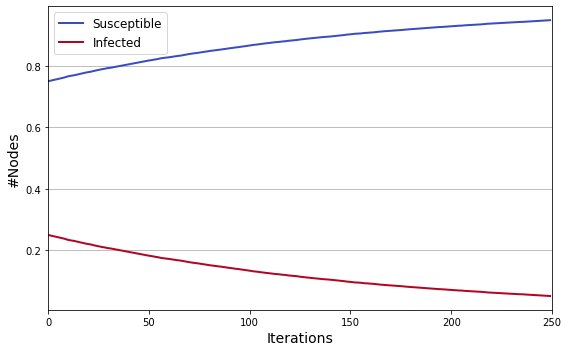


 ----------------------------- FRACTION INFECTED = 0.5 -----------------------------

 Number of neighbours = 3 


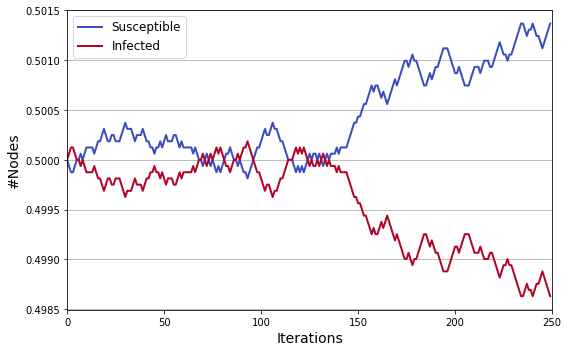


 Number of neighbours = 5 


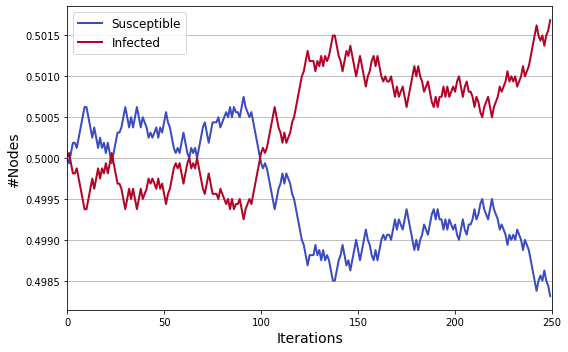


 Number of neighbours = 10 


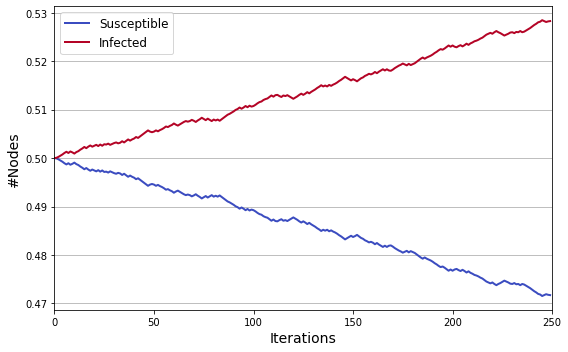


 Number of neighbours = 100 


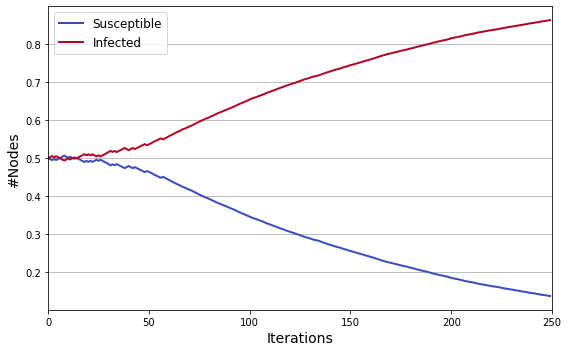


 ----------------------------- FRACTION INFECTED = 0.75 -----------------------------

 Number of neighbours = 3 


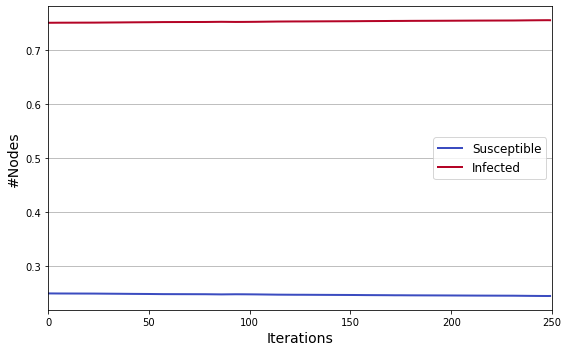


 Number of neighbours = 5 


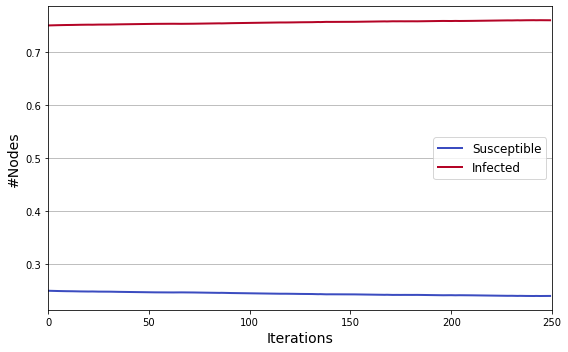


 Number of neighbours = 10 


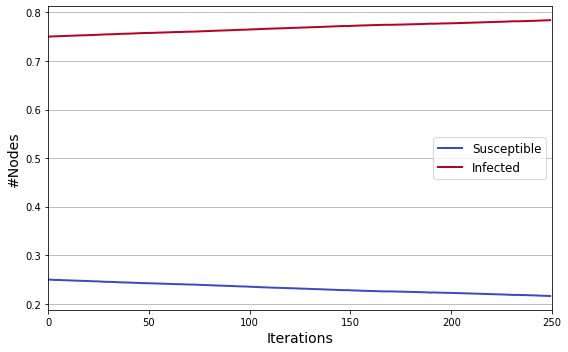


 Number of neighbours = 100 


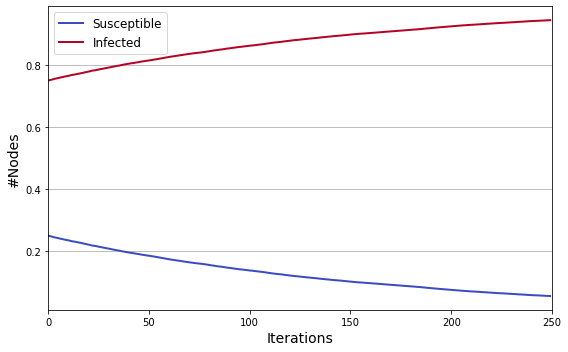


 ----------------------------- FRACTION INFECTED = 0.34 -----------------------------

 Number of neighbours = 3 


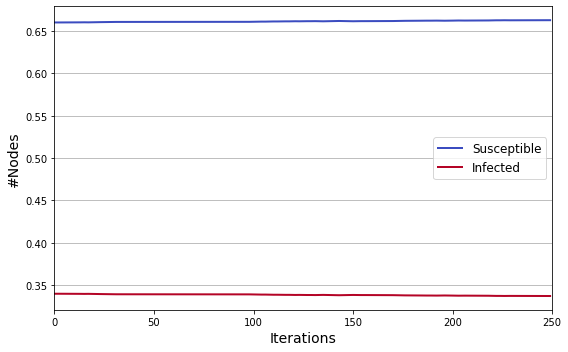


 Number of neighbours = 5 


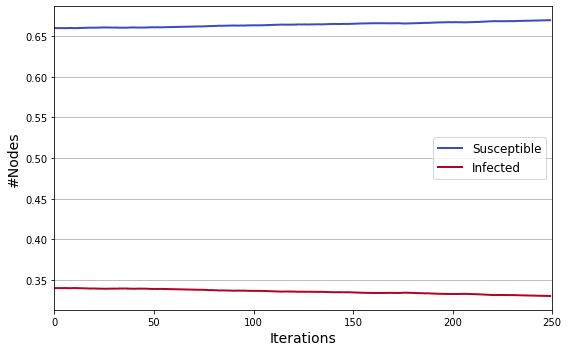


 Number of neighbours = 10 


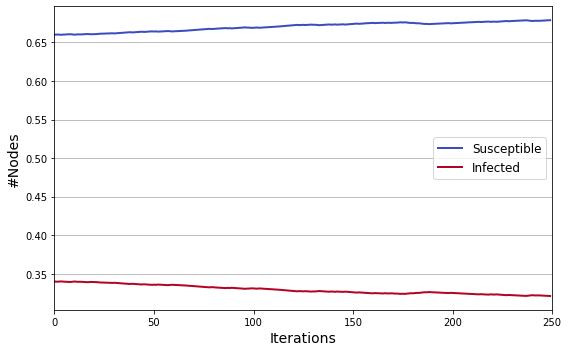


 Number of neighbours = 100 


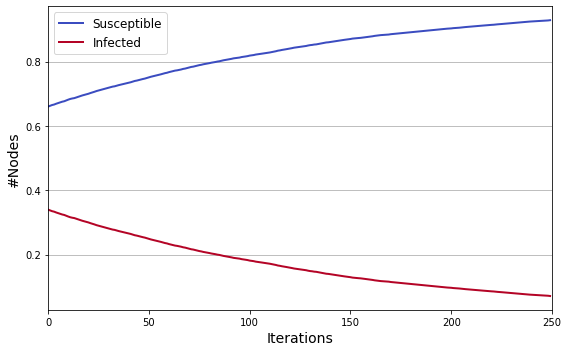

In [32]:
for f in [0.25, 0.5, 0.75, real]:
    print(f"\n\033[1m ----------------------------- FRACTION INFECTED = {f} -----------------------------\033[0m")
    for q in [3,5,10,100]:
        print(f"\n\033[1m Number of neighbours = {q} \033[0m")
        majority_model (G0, q, f, 250)